<a href="https://colab.research.google.com/github/luiscarlo5/RandomForest_Breast_Cancer/blob/main/Random_Forest_C%C3%A2ncer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Classificação Com Random Forest de Câncer de Mama para Oficina 2 do Programa Capacita Brasil**
**Autor:** Luis Carlos Rodrigues dos Anjos

**Instituição:** UECE - Capacita Brasil

**Data:** 31/08/2025

**Linkedin:** www.linkedin.com/in/luis-carlos-eng-comp

**GitHub:** https://github.com/luiscarlo5/RandomForest_Breast_Cancer

---

## **Introdução**

Este Notebook tem como objetivo aplicar o algoritmo de classificação Random Forest para identificar câncer de mama de carater Benigno ou Maligno, para colocar em práticas técnicas de processamento de dados e de machine learning.

-> Para criação de um modelo eficiente e com menor possibilidade de Overfitting existe aqui um tratamento de dados e separação dos dados em dados de teste (70%) e treino (30%). Isso evita que ocorraoverfitting no modelo e maior eficiência no resultado. **Obs.:** foi realizado o tratamento de outlliers e normalização apenas, uma vez que não há dados faltantes ou duplicados no dataset utilizado.

---
---
### **Modelo de Classificação**

O modelo de classificação explorado nesse trabalho é o Random Forest, modelo de aprendizado de máquina supervisionado baseado em vários classificadores do tipo árvore de decisão. Ele é um conjunto de várias árvores de decisão que se ajudam para fazer uma previsão mais confiável e possui os seguintes hiperparâmetros:
| Parâmetro           | Explicação                                                                                                |
| ------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `n_estimators`      | **Número de árvores** na floresta. Mais árvores → melhor desempenho (até certo ponto). Ex: `n_estimators=100`                     |
| `max_depth`         | Profundidade máxima de cada árvore. Limita a complexidade e ajuda a evitar **overfitting**. Ex: `max_depth=10`                    |
| `min_samples_split` | Número mínimo de amostras necessário para dividir um nó. Aumentar esse valor → árvores menos profundas. Ex: `min_samples_split=5` |
| `min_samples_leaf`  | Número mínimo de amostras em cada folha (nó terminal). Evita folhas muito pequenas e **overfitting**. Ex: `min_samples_leaf=2`    |
| `random_state`      | Semente aleatória. Usado para **reprodutibilidade** dos resultados. Ex: `random_state=42`                                         |
| `criterion`         | Métrica para medir a qualidade de uma divisão. Pode ser `'gini'` (padrão) ou `'entropy'`.                                         |
| `max_features`      | Número de features a considerar quando se divide um nó. Ex: `'auto'`, `'sqrt'`, `'log2'`. Controla a aleatoriedade.               |

Neste notebook foram testados valores diferentes para `n_estimators`, `min_samples_split` e `max_depth` de modo que houvesse comparação entre diferentes configurações de hiperparâmetros

---
---
### **Treinamento e Avaliação**

O modelo foi dividido em 30% dados de teste e 70% dados de treinamento e foi avaliado com as seguintes métricas:
- **Precision** (Precisão): mede a qualidade das previsões positivas;
- **Recall** (Sensibilidade ou Revocação): mede a capacidade do modelo de encontrar todos os positivos reais;
- **F1-Score**: média harmônica entre precision e recall;
- **ROC-AUC**: mostra o quão bem o modelo separa as classes (quanto mais próximo de 1, melhor ele é);
- Acurácia: mede quantas previsões o modelo acertou no total.

Estas métricas foram adquiridas através de roc_auc_score, roc_curve, classification_report e accuracy_score e são extremamente importantes para entendimento e comparação dos resultados.

---
---


## Importação de Bibliotecas

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

## Ánalide Exploratória dos Dados

### Leitura dos Dados

In [68]:
# Carregar a base de dados do câncer de mama diretamente da biblioteca sklearn
data = load_breast_cancer()

# Converter os dados em um DataFrame para facilitar a manipulação
df = pd.DataFrame(data.data, columns=data.feature_names)

#### Colunas

In [ ]:
# Exibir colunas
df.columns

#### Informações

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### 5 primeiras linhas

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Maligno


### Gerar gráficos de distribuição para features selecionadas

/tmp/ipython-input-1503379817.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnóstico")


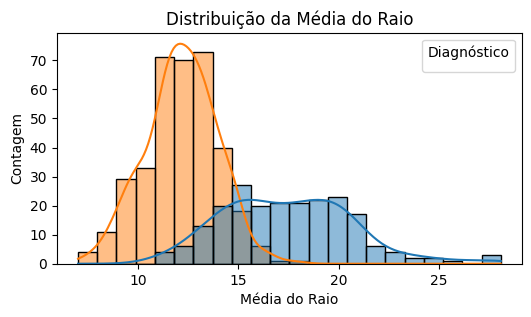

/tmp/ipython-input-1503379817.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnóstico")


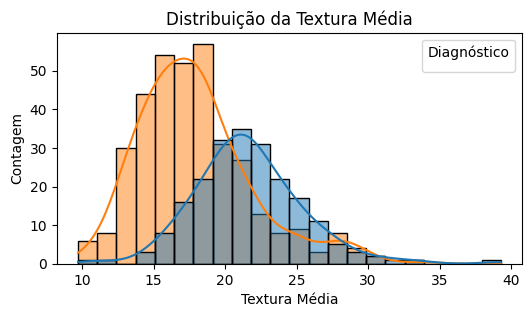

/tmp/ipython-input-1503379817.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Diagnóstico")


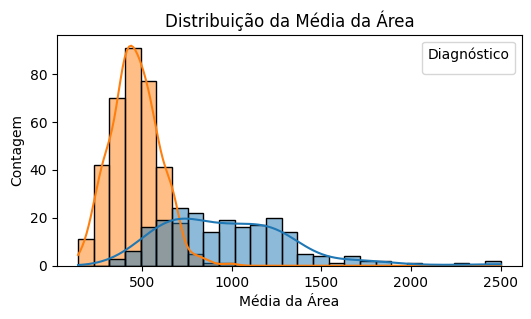

In [49]:
df_aux = pd.DataFrame(data.data, columns=data.feature_names)

# Adiciona uma coluna “diagnosis” ao DataFrame, que contém o rótulo de diagnóstico (0 para maligno, 1 para benigno)
df_aux['diagnosis'] = data.target

# Mapeia 0 para ‘Maligno’ e 1 para ‘Benigno’ na coluna ‘diagnosis’ para facilitar a compreensão
df_aux['diagnosis'] = df_aux['diagnosis'].map({0: 'Maligno', 1: 'Benigno'})

# Selecionar algumas features para visualização
features_to_plot = ['mean radius', 'mean texture', 'mean area']

# Gerar gráficos de distribuição features selecionadas
for feature in features_to_plot:
    plt.figure(figsize=(6, 3))

    # Plotar as distribuições das características separadas por diagnóstico
    sns.histplot(df_aux, x=feature, hue='diagnosis', kde=True)

    # Ajuste dos títulos em português
    if "radius" in feature:
        titulo = "Média do Raio"
        eixo_x = "Média do Raio"
    elif "texture" in feature:
        titulo = "Textura Média"
        eixo_x = "Textura Média"
    elif "area" in feature:
        titulo = "Média da Área"
        eixo_x = "Média da Área"

    # Configurar o título e os rótulos dos eixos
    plt.title(f'Distribuição da {titulo}')
    plt.xlabel(eixo_x)
    plt.ylabel("Contagem")

    # Exibir a legenda que diferencia entre os diagnósticos
    plt.legend(title="Diagnóstico")

    # Exibir o gráfico
    plt.show()


## **Pré-processamento dos dados**

### **Box Plot** pré Tratamento de Outliers

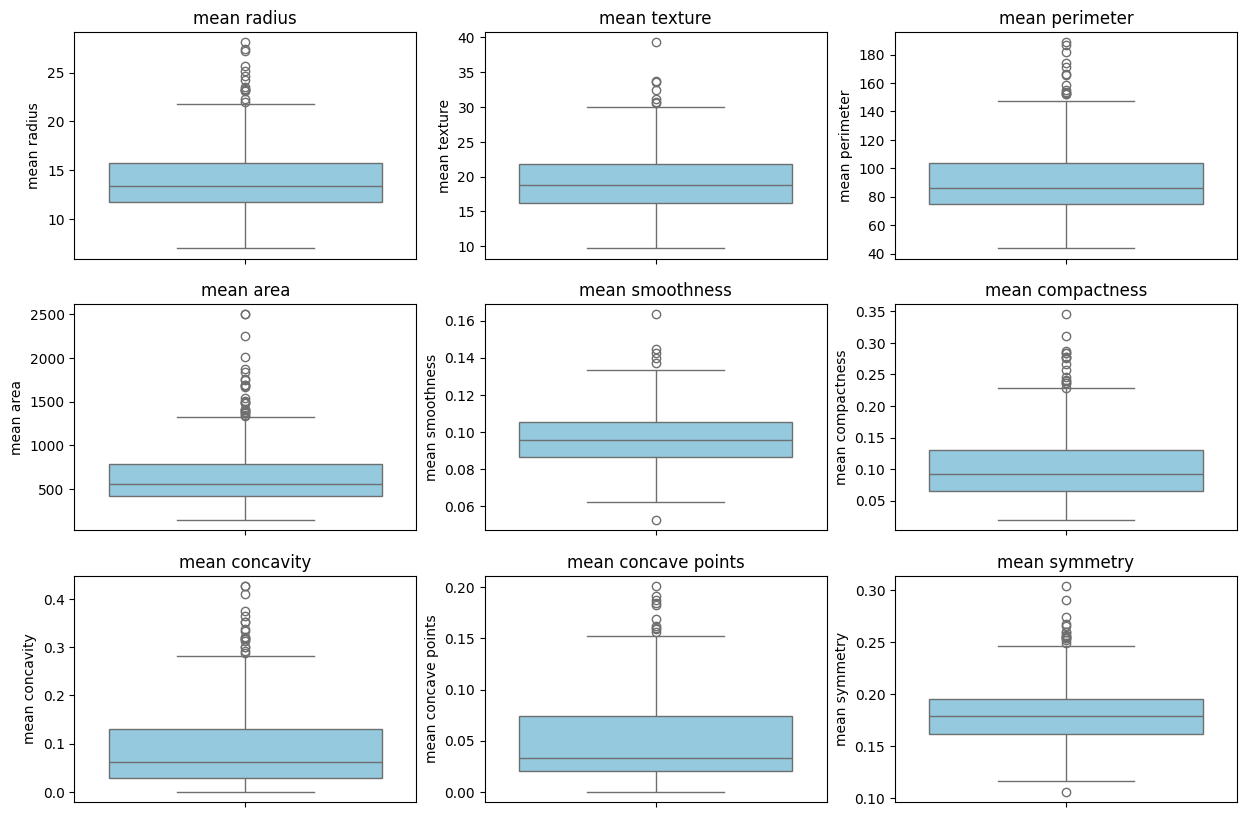

In [ ]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=["float64"]).columns

# Criar boxplots para cada coluna numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)   # cria grid de subplots (3x3)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
    if i == 9:
      break

### **Tratamento de Outliers**

In [ ]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=["float64"]).columns

# Criar cópia para não alterar o original
df_clean = df.copy()

# Definir limite de Z-Score
limite = 3
print(numeric_cols)
for col in numeric_cols:
    if col == "housing_median_age" or col == "latitude" or  col == "longitude":
        continue
    # Preencher valores ausentes com a mediana antes de calcular o Z-Score
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


    z_scores = stats.zscore(df_clean[col])           # calcula Z-Score
    outliers = np.abs(z_scores) > limite             # identifica outliers

    # Substituir outliers pela média da column
    media = df_clean[col].mean()
    df_clean.loc[outliers, col] = media

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


### **Box Plot** pós Tratamento de Outliers

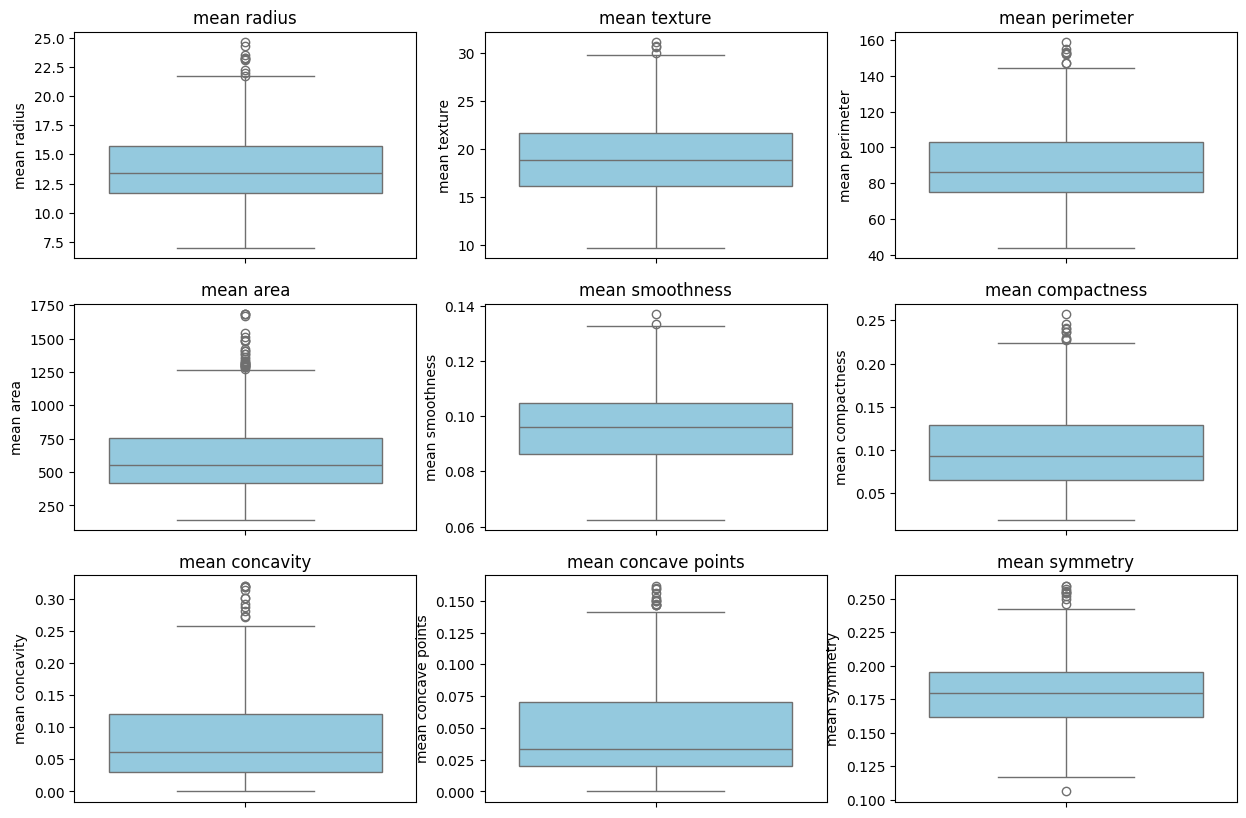

In [ ]:
# Selecionar apenas colunas numéricas
numeric_cols = df_clean.select_dtypes(include=["float64"]).columns

# Criar boxplots para cada coluna numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)   # cria grid de subplots (3x3)
    sns.boxplot(y=df_clean[col], color="skyblue")
    plt.title(col)
    if i == 9:
      break

### Normalização dos Dados

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [70]:
df_normalizado.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.623775,0.031294,0.686387,0.555916,0.749296,0.356649,0.937520,0.908025,0.884190,0.880551,...,0.764680,0.172571,0.858047,0.771542,0.703315,0.936337,0.838615,0.912027,0.952321,0.784907
1,0.769959,0.376460,0.774129,0.766613,0.298029,0.248762,0.271478,0.433148,0.489265,0.205513,...,0.747590,0.370166,0.693075,0.745035,0.406629,0.233692,0.284604,0.639175,0.371706,0.417650
2,0.720097,0.539000,0.748936,0.686872,0.631318,0.589875,0.616682,0.789506,0.656474,0.307198,...,0.685364,0.439064,0.652791,0.641114,0.565788,0.582667,0.530569,0.835052,0.642409,0.399951
3,0.251516,0.498365,0.293545,0.157277,0.453818,0.356649,0.754139,0.649383,1.000000,0.393189,...,0.305872,0.470588,0.309866,0.160931,0.472832,0.332950,0.809165,0.884880,0.418995,0.355283
4,0.754094,0.216254,0.793241,0.747812,0.506636,0.476115,0.618557,0.643827,0.487313,0.271669,...,0.640228,0.151121,0.650873,0.584736,0.511705,0.260683,0.471198,0.558419,0.250627,0.267207


## **Divisão do conjunto de dados**

### Criação de Coluna target

In [71]:
# Adiciona uma coluna “diagnosis” ao DataFrame, que contém o rótulo de diagnóstico (0 para maligno, 1 para benigno)
df_normalizado['diagnosis'] = data.target

# Mapeia 0 para ‘Maligno’ e 1 para ‘Benigno’ na coluna ‘diagnosis’ para facilitar a compreensão
df_normalizado['diagnosis'] = df_normalizado['diagnosis'].map({0: 'Maligno', 1: 'Benigno'})

### Divisão em Dados de Treino e Teste

In [27]:
# Colunas de atributos (todas as colunas menos a target/Alvo)
X = df_normalizado.drop('diagnosis', axis=1)

# Target/Alvo (variável que queremos prever)
y = df_normalizado['diagnosis']

# 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,   # 30% para teste
    random_state=42  # fixar semente para reproduzibilidade
)

## **Treinamento do modelo**

- n_estimators: Define o número de árvores na floresta. Mais árvores podem melhorar a precisão, mas também aumentam o tempo de computação.

- max_depth: Controla a profundidade máxima das árvores. Definir uma profundidade muito alta pode causar overfitting, onde o modelo se ajusta demais aos dados de treinamento.

In [28]:
# Criar o modelo Random Forest
clf_1 = RandomForestClassifier(
    n_estimators=100,         # Usaremos 100 árvores na floresta
    max_depth=10,             # Limita a profundidade das árvores para evitar overfitting
    min_samples_split=5,      # Um nó precisa ter no mínimo 5 amostras para ser dividido
    min_samples_leaf=2,       # Cada folha precisa ter no mínimo 2 amostras
    random_state=42           # Garante que os resultados sejam reprodutíveis
)

# Treinar o modelo usando os dados de treino
clf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=120, random_state=42)

## **Avaliação do modelo**

### Predição/Teste

In [32]:
# Primeiro Modelo
y_pred_1 = clf_1.predict(X_test)

### ***Relatórios de Classificação***

In [30]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

     Benigno       0.95      0.98      0.97       108
     Maligno       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### ***ROC-AUC***

In [40]:
# Pega as probabilidades da classe positiva (ex: 'Benigno')
y_pred_proba = clf_1.predict_proba(X_test)[:, 1]

# Converter os rótulos para 0 e 1
y_test_bin = y_test.map({'Benigno': 0, 'Maligno': 1})


AUC: 0.9959


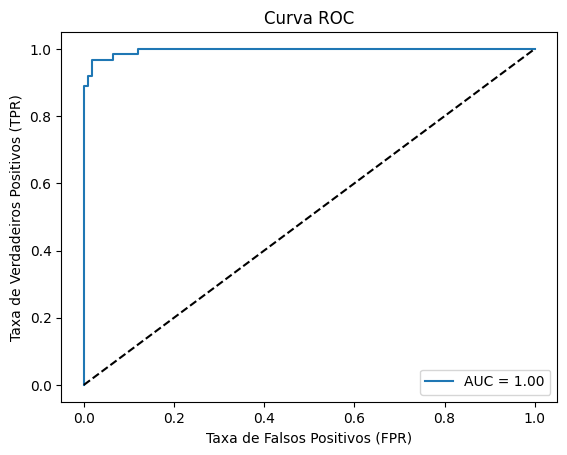

In [39]:
# Calcular AUC
auc = roc_auc_score(y_test_bin, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Gerar curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)

# Plotar a curva
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # linha aleatória
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()


- Com AUC = 0.9959 significa que o modelo é altamente eficaz em distinguir tumores malignos de benignos.

## **Ajuste de hiperparâmetros**

### *Segundo Modelo (Mais árvores, maior profundidade e 3 amostras mínimas por folha)*

In [52]:
# Criar o modelo Random Forest
clf_2 = RandomForestClassifier(
    n_estimators=120,         # 120 árvores na floresta
    max_depth=12,             # Limita a profundidade das árvores em 12
    min_samples_split=6,      # Um nó precisa ter no mínimo 5 amostras para ser dividido
    min_samples_leaf=3,       # Cada folha precisa ter no mínimo 3 amostras
    random_state=42           # Garante que os resultados sejam reprodutíveis
)

# Treinar o modelo usando os dados de treino
clf_2.fit(X_train, y_train)

# Segundo Modelo
y_pred_2 = clf_2.predict(X_test)

### *Terceiro Modelo (Menos árvores, menor profundidade e 2 amostras mínimas por folha)*

In [53]:
# Criar o modelo Random Forest
clf_3 = RandomForestClassifier(
    n_estimators=75,          # 75 árvores na floresta
    max_depth=8,              # Limita a profundidade das árvores em 8
    min_samples_split=6,      # Um nó precisa ter no mínimo 5 amostras para ser dividido
    min_samples_leaf=2,       # Cada folha precisa ter no mínimo 2 amostras
    random_state=42           # Garante que os resultados sejam reprodutíveis
)

# Treinar o modelo usando os dados de treino
clf_3.fit(X_train, y_train)

# Segundo Modelo
y_pred_3 = clf_3.predict(X_test)

##### **Resultados de Segundo Modelo**

In [54]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.98       108
     Maligno       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



##### **Resultados de Terceiro Modelo**

In [55]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

     Benigno       0.96      0.98      0.97       108
     Maligno       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## **Validação cruzada (cross-validation)**
-  Técnica para avaliar a performance do modelo de forma mais robusta, dividindo os dados em várias partes (folds), treinando e testando múltiplas vezes. Isso ajuda a evitar que o modelo superestime sua capacidade por estar testando em um único conjunto.

In [58]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')


In [59]:
print(f'Scores AUC por fold: {scores}')
print(f'Média AUC: {scores.mean():.4f}')


Scores AUC por fold: [0.98411399 0.98329512 0.99900794 0.99305556 0.99782025]
Média AUC: 0.9915


## Comparação de Resultados dos 3 modelos
- Veja que os resultados são quase idênticos

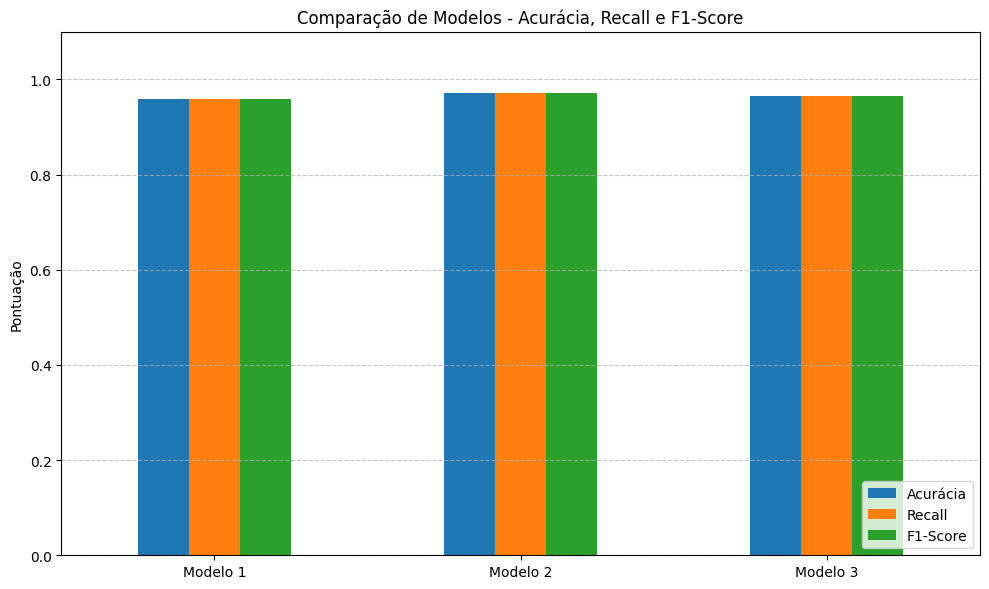

In [74]:
# Gerar os relatórios de classificação para cada modelo
report_1 = classification_report(y_test, y_pred_1, output_dict=True)
report_2 = classification_report(y_test, y_pred_2, output_dict=True)
report_3 = classification_report(y_test, y_pred_3, output_dict=True)

# Extrair métricas (usamos 'weighted avg' para refletir todas as classes)
metrics = {
    'Modelo 1': {
        'Acurácia': accuracy_score(y_test, y_pred_1),
        'Recall': report_1['weighted avg']['recall'],
        'F1-Score': report_1['weighted avg']['f1-score']
    },
    'Modelo 2': {
        'Acurácia': accuracy_score(y_test, y_pred_2),
        'Recall': report_2['weighted avg']['recall'],
        'F1-Score': report_2['weighted avg']['f1-score']
    },
    'Modelo 3': {
        'Acurácia': accuracy_score(y_test, y_pred_3),
        'Recall': report_3['weighted avg']['recall'],
        'F1-Score': report_3['weighted avg']['f1-score']
    }
}

# Criar DataFrame com os dados
df_metrics = pd.DataFrame(metrics)

# Transpor para melhor visualização no gráfico
df_metrics = df_metrics.T

# Plotar gráfico
df_metrics.plot(kind='bar', figsize=(10,6))
plt.title('Comparação de Modelos - Acurácia, Recall e F1-Score')
plt.ylabel('Pontuação')
plt.ylim(0.0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [76]:
print(metrics['Modelo 1'])
print(metrics['Modelo 2'])
print(metrics['Modelo 3'])

{'Acurácia': 0.9590643274853801, 'Recall': 0.9590643274853801, 'F1-Score': 0.9588454932855025}
{'Acurácia': 0.9707602339181286, 'Recall': 0.9707602339181286, 'F1-Score': 0.970603923775359}
{'Acurácia': 0.9649122807017544, 'Recall': 0.9649122807017544, 'F1-Score': 0.9647902680643604}


## **Conclusão**

- Os modelos utilizados obtiveram acurácias acima de 95% em todas as três configurações de hiperparâmetros testadas neste notebook, com destaque para o modelo de Random Forest com 75 árvores. Isso demonstra que nem sempre um número maior de hiperparâmetros ou uma profundidade maior resulta em um modelo melhor, já que o modelo com 75 árvores apresentou desempenho superior ao de 100 árvores, mesmo sendo menos profundo.

- Todo o preprocessamento realizado nos dados foram fundamentais para eficiência do modelo e diminuição do risco de overfitting. Isso possibilita um modelo de classificação que tende a acertar mais em dados de amostras reais fora do dataset.

- O uso de métricas foi fundamental para saber se os modelos realmente foram eficientes. Além disso, o uso da métrica ROC-AUC foi muito importante não somente para corroborar ainda mais a conclusão sobre a eficiência do modelo, mas também para aplicação de uma métrica não tão vista como acurácia, f1-score e precisão, mas que pode agregar muito na análise de um modelo de machine learning.

- A técnica de validação cruzada também foi aplicada com o objetivo de avaliar a performance do modelo de forma mais robusta e confiável. Por meio da divisão dos dados em cinco subconjuntos (folds), o modelo foi treinado e testado múltiplas vezes, garantindo que a avaliação considerasse diferentes partes dos dados. Essa abordagem evita que o modelo seja avaliado com viés ou que se beneficie apenas de uma divisão específica dos dados. Os resultados mostraram uma AUC média de aproximadamente 0.9915, confirmando a consistência e alta capacidade preditiva do modelo de Random Forest, mesmo sob diferentes divisões dos dados.

## Info. sobre a métrica ROC-AUC

### Métrica ROC-AUC
A métrica ROC-AUC é amplamente utilizada na avaliação de modelos de classificação binária, como no caso de diagnósticos médicos onde é necessário prever, por exemplo, se um tumor é benigno ou maligno. O termo ROC significa Receiver Operating Characteristic, que representa uma curva que mostra o desempenho do modelo ao longo de todos os possíveis limiares de decisão. Já o AUC, Area Under the Curve, corresponde à área sob essa curva e indica o quão bem o modelo é capaz de distinguir entre as duas classes.

A Curva ROC é traçada com base em dois indicadores: a taxa de verdadeiros positivos (recall ou sensibilidade) no eixo vertical e a taxa de falsos positivos no eixo horizontal. Cada ponto na curva representa um possível limiar de probabilidade para classificar uma instância como positiva. Assim, o modelo que gera essa curva não está limitado a um único ponto de corte (como 0.5), mas sim avaliado em toda a sua capacidade de prever corretamente para diferentes limiares.

O valor do AUC varia de 0 a 1. Um modelo com AUC igual a 1 é considerado perfeito: ele sempre classifica corretamente um exemplo positivo como mais provável que um exemplo negativo. Já um AUC de 0.5 indica um modelo que não tem nenhuma capacidade discriminativa — equivalente a um chute aleatório. Na prática, quanto mais próximo de 1 for o valor do AUC, melhor o modelo é na tarefa de separação entre as classes.

Uma das principais vantagens da métrica ROC-AUC é que ela é útil mesmo em situações de desequilíbrio entre classes, onde métricas como acurácia podem ser enganosas. Ela mostra não apenas se o modelo está acertando, mas se ele está aprendendo a priorizar corretamente os casos realmente importantes.

**links de estudos sobre o tema**:
- https://youtu.be/q1cn8GPxHsI?si=C2EBh2tnSqRgWhEy
- https://youtu.be/YyCgrYIcEOE?si=9sSagpufl4_Dscy9
- https://mariofilho.com/guia-completo-sobre-roc-auc-em-machine-learning/